# KBO 리그 타자 성과 분석 및 예측

1. 프로젝트 목표 
   - 주제
     - KBO 리그 타자 성과 분석 및 예측
   - 목표
     - 데이터를 기반으로 타자 성과를 분석하여 팀 구성 전략 및 경기 전략 인사이트 도출.
     - 특정 타자의 미래 성과를 머신러닝 모델을 활용하여 예측.
2. 데이터 전처리
   1. 결측치 처리
    - 데이터셋에서 결측값 확인 및 처리.
    - 주요 성과 지표에 결측값이 있는 경우 별도 처리.
   2. 중복 제거
    - 타자 이름, 연도, 팀 데이터를 기준으로 중복된 행 제거.
   3. 필요한 컬럼 선택
    - 분석 및 예측에 필요한 주요 지표만 선정.
   4. 데이터 변환
    - 카테고리형 데이터를 숫자형으로 인코딩.
    - 연속형 변수의 스케일 조정
   5. 데이터 분리
    - 훈련 데이터와 테스트 데이터로 분리
3. 탐색적 데이터 분석(EDA)
   1. 기술 통계
    - 주요 성과 지표의 분포 확인.
   2. 상관 분석
    - 주요 지표 간 상관 관계 분석.
   3. 군집 분석
    - 타자들을 유형으로 분류하기 위한 K-means 클러스터링.
   4. 연도 별 트렌드 분석
    - 타격 성과의 연도별 변화를 시각화.
   5. 상위/하위 타자 비교
    - 성과 상위 10%와 하위 10% 타자의 특징 비교.
4. 예측 모델 구축
   1. 목표 변수
    - 타자의 AVG, OPS 예측.
   2. 특징 선택
    - 주요 성과 지표.
   3. 모델 선택
    - 회귀모델 : 랜덤 포레스트, 선형 회귀.
   4. 모델 학습
    - 훈련 데이터를 사용해 모델 학습.
   5. 성능 평가
    - 테스트 데이터를 활용한 RMSE, MAE 등의 평가 지표 계산.
   6. 하이퍼파라미터 튜닝
    - 그리드 서치나 랜덤 서치로 최적화.
   7. 결과 해석
    - 예측 결과를 실제 데이터와 비교하여 성과 확인.
5. 인사이트 도출 및 전략 제안
   1. 타자 유형 별 인사이트
    - 각 유형의 강점과 약점 분석 및 전략적 활용 방안 제안.
   2. 팀 별 분석
    - 팀 내 주요 타자 조합 및 전략 추천.
   3. 미래 성과 예측 활용
    - 특정 타자의 성과 예측을 기반으로 트레이드 가치, 경기 전략 수립 제안.
6. 보고서 작성
   1. 보고서 작성
    - 분석 결과, 인사이트, 제안 등을 포함한 종합 보고서 작성.
    - 주요 시각화 자료 포함.
  

## 데이터 불러오기

In [98]:
import pandas as pd

file_path = './data/2019_kbo_data.csv'
data = pd.read_csv(file_path)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   batter_name  1913 non-null   object 
 1   age          1913 non-null   float64
 2   G            1913 non-null   float64
 3   PA           1913 non-null   float64
 4   AB           1913 non-null   float64
 5   R            1913 non-null   float64
 6   H            1913 non-null   float64
 7   2B           1913 non-null   float64
 8   3B           1913 non-null   float64
 9   HR           1913 non-null   float64
 10  TB           1913 non-null   float64
 11  RBI          1913 non-null   float64
 12  SB           1913 non-null   float64
 13  CS           1913 non-null   float64
 14  BB           1913 non-null   float64
 15  HBP          1913 non-null   float64
 16  GB           1913 non-null   float64
 17  SO           1913 non-null   float64
 18  GDP          1913 non-null   float64
 19  BU    

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691


## 데이터셋 요약

1. 데이터 개요
   - 행 개수 : 1,913
   - 열 개수 : 37
   - 결측값 : 69

2. 주요 열 설명

|열 이름|설명|
|---|---|
|`batter_name`|타자 이름|
|`age`|나이|
|`G`|경기 수|
|`PA`|타석 수|
|`AB`|타수|
|`R`|득점 수|
|`H`|안타 수|
|`2B`|2루타 수|
|`3B`|3루타 수|
|`HR`|홈런 수|
|`TB`|총루타 수|
|`RBI`|타점|
|`SB`|도루 수|
|`CS`|도루 실패 수|
|`BB`|볼넷 수|
|`HBP`|사구 수|
|`SO`|삼진 수|
|`war`|대체 선수 대비 기여도|
|`salary`|연봉(단위 : 1,000원)|
|`hand2`|타격 및 투구 유형|
|`cp`|주요 포지션|
|`avg`|타율|
|`OBP`|출루율|
|`SLG`|장타율|
|`OPS`|OPS|

3. 데이터 요약
   - 평균 연령 : 약 27세
   - 평균 경기 수 : 약 79경기
   - 평균 연봉 : 약 14,112,000원
   - 최고 WAR : 10.873
   - 최저 WAR : -1.616
   - 평균 OPS : 0.679

## 데이터 전처리

### 결측치 확인 및 처리
-  avg, OBP, SLG, OPS, YOPS에 결측치 존재
-  결측치 제거

In [99]:
# 결측치 제거
data = data.dropna()

# 결측치 제거 후 데이터 확인
print(data.isnull().sum().sum())
data.info()


0
<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 0 to 1912
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   batter_name  1885 non-null   object 
 1   age          1885 non-null   float64
 2   G            1885 non-null   float64
 3   PA           1885 non-null   float64
 4   AB           1885 non-null   float64
 5   R            1885 non-null   float64
 6   H            1885 non-null   float64
 7   2B           1885 non-null   float64
 8   3B           1885 non-null   float64
 9   HR           1885 non-null   float64
 10  TB           1885 non-null   float64
 11  RBI          1885 non-null   float64
 12  SB           1885 non-null   float64
 13  CS           1885 non-null   float64
 14  BB           1885 non-null   float64
 15  HBP          1885 non-null   float64
 16  GB           1885 non-null   float64
 17  SO           1885 non-null   float64
 18  GDP          1885 non-null   float64
 19  BU       

### 중복 제거

In [100]:
# 중복 데이터 확인
duplicates_data = data.duplicated(subset=['batter_name', 'year', 'tp']).sum()
print(duplicates_data)

0


In [101]:
# 중복 데이터 제거
data_no_duplicates = data.drop_duplicates(subset=['batter_name', 'year', 'tp'])
data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 0 to 1912
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   batter_name  1885 non-null   object 
 1   age          1885 non-null   float64
 2   G            1885 non-null   float64
 3   PA           1885 non-null   float64
 4   AB           1885 non-null   float64
 5   R            1885 non-null   float64
 6   H            1885 non-null   float64
 7   2B           1885 non-null   float64
 8   3B           1885 non-null   float64
 9   HR           1885 non-null   float64
 10  TB           1885 non-null   float64
 11  RBI          1885 non-null   float64
 12  SB           1885 non-null   float64
 13  CS           1885 non-null   float64
 14  BB           1885 non-null   float64
 15  HBP          1885 non-null   float64
 16  GB           1885 non-null   float64
 17  SO           1885 non-null   float64
 18  GDP          1885 non-null   float64
 19  BU         

In [102]:
# 변수명 변경
data = data_no_duplicates

### 필요 컬럼 선택
- 타자 정보
  - batter_name
  - age
  - tp
- 성과 지표
  - G
  - PA
  - AB
  - R
  - H
  - HR
  - SB
  - BB
  - SO
- 평균 및 비율 지표
  - avg
  - OBP
  - SLG
  - OPS
- 연도 정보
  - year

In [103]:
# 필요 컬럼 설정
selected_cols = ['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', 'HR', 'SB', 'BB', 'SO', 'avg', 'OBP', 'SLG', 'OPS', 'tp', 'year']

data = data[selected_cols]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 0 to 1912
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   batter_name  1885 non-null   object 
 1   age          1885 non-null   float64
 2   G            1885 non-null   float64
 3   PA           1885 non-null   float64
 4   AB           1885 non-null   float64
 5   R            1885 non-null   float64
 6   H            1885 non-null   float64
 7   HR           1885 non-null   float64
 8   SB           1885 non-null   float64
 9   BB           1885 non-null   float64
 10  SO           1885 non-null   float64
 11  avg          1885 non-null   float64
 12  OBP          1885 non-null   float64
 13  SLG          1885 non-null   float64
 14  OPS          1885 non-null   float64
 15  tp           1885 non-null   object 
 16  year         1885 non-null   int64  
dtypes: float64(14), int64(1), object(2)
memory usage: 265.1+ KB


### 데이터 변환
- 카테고리형 데이터 인코딩
  - tp를 숫자형으로 변환.
- 연속형 변수 스케일링
  - 숫자형 컬럼을 표준화

In [104]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 인코딩
le = LabelEncoder()
data['tp_encoded'] = le.fit_transform(data['tp'])

data = data.drop(columns=['tp'])

# 스케일링
ss = StandardScaler()
num_cols = ['age', 'G', 'PA', 'AB', 'R', 'H', 'HR', 'SB', 'BB', 'SO', 'avg', 'OBP', 'SLG', 'OPS']

data_scale = data.copy()
data_scale[num_cols] = ss.fit_transform(data[num_cols])

# 변환 데이터 확인
data.head()
data_scale.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_29520\2068304534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tp_encoded'] = le.fit_transform(data['tp'])


,batter_name,age,G,PA,AB,R,H,HR,SB,BB,SO,avg,OBP,SLG,OPS,year,tp_encoded
0,백용환,-0.646836,-1.243421,-1.064360,-1.059032,-1.047453,-1.059278,-0.760842,-0.663289,-0.838037,-0.860131,-0.853822,-0.597482,-0.731624,-0.713245,2013,8
1,백용환,-0.426071,-0.763082,-0.920722,-0.899918,-0.909964,-0.964578,-0.289109,-0.663289,-0.884188,-0.484254,-0.808105,-0.934049,-0.054459,-0.417010,2014,8
2,백용환,-0.205306,-0.351363,-0.453899,-0.457938,-0.428751,-0.547901,0.418491,-0.318980,-0.238075,0.110886,-0.156643,-0.016140,0.687818,0.434146,2015,8
3,백용환,0.015459,-0.008264,-0.341041,-0.340076,-0.772475,-0.585780,-0.289109,-0.433750,-0.238075,0.267501,-0.602380,-0.424100,-0.373508,-0.412837,2016,8
4,백용환,0.236225,-1.495027,-1.259297,-1.265289,-1.116198,-1.172917,-0.760842,-0.663289,-0.976489,-1.267332,-0.819534,-0.179324,-1.213453,-0.850932,2017,8


### 데이터 분리
- train data : 1,508개
- test data : 377개
- 사용 컬럼 : age, G, PA, AB, R, H, HR, SB, BB, SO, avg, OBP, SLG, year, tp_encoded

In [105]:
from sklearn.model_selection import train_test_split

x = data_scale.drop(columns=['batter_name', 'OPS'])
y = data_scale['OPS']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

x_train.info()
x_test.info()
x.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 1842 to 1141
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1508 non-null   float64
 1   G           1508 non-null   float64
 2   PA          1508 non-null   float64
 3   AB          1508 non-null   float64
 4   R           1508 non-null   float64
 5   H           1508 non-null   float64
 6   HR          1508 non-null   float64
 7   SB          1508 non-null   float64
 8   BB          1508 non-null   float64
 9   SO          1508 non-null   float64
 10  avg         1508 non-null   float64
 11  OBP         1508 non-null   float64
 12  SLG         1508 non-null   float64
 13  year        1508 non-null   int64  
 14  tp_encoded  1508 non-null   int32  
dtypes: float64(13), int32(1), int64(1)
memory usage: 182.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 309 to 341
Data columns (total 15 columns):
 #   Column      Non-Null Count  

['age',
 'G',
 'PA',
 'AB',
 'R',
 'H',
 'HR',
 'SB',
 'BB',
 'SO',
 'avg',
 'OBP',
 'SLG',
 'year',
 'tp_encoded']

## 탐색적 데이터 분석

### 기술 통계

In [106]:
x_train.describe()

,age,G,PA,AB,R,H,HR,SB,BB,SO,avg,OBP,SLG,year,tp_encoded
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.014435,0.000428,-0.000530,0.000175,-0.002972,-0.000188,0.005334,-0.012497,-0.003923,0.004433,-0.006147,-0.008558,-0.001955,2011.042440,3.912467
std,1.001229,1.002187,0.998878,0.999947,0.995958,0.998129,1.006697,0.955198,0.995505,1.011897,1.005209,1.008795,1.026908,6.023031,2.526101
min,-1.971428,-1.815253,-1.356766,-1.359579,-1.184943,-1.229737,-0.760842,-0.663289,-1.114942,-1.361301,-2.831066,-3.239022,-2.359425,1990.000000,0.000000
25%,-0.646836,-0.906040,-1.023321,-1.017780,-0.909964,-0.983518,-0.760842,-0.663289,-0.884188,-0.891454,-0.350939,-0.281314,-0.432109,2007.750000,2.000000
50%,0.015459,0.289089,0.007794,-0.018903,-0.188145,-0.112283,-0.407042,-0.433750,-0.191924,-0.045730,0.174802,0.157243,0.062742,2012.000000,4.000000
75%,0.677755,0.883795,0.926051,0.926936,0.714128,0.839447,0.300558,0.254867,0.638792,0.674702,0.574823,0.544805,0.570616,2016.000000,6.000000
max,3.106172,1.455627,2.085414,2.028942,3.455321,2.577183,5.607559,6.222881,4.053959,3.211875,8.598091,6.959972,17.174185,2018.000000,8.000000


### 상관 분석

In [107]:
x_train.corr()

,age,G,PA,AB,R,H,HR,SB,BB,SO,avg,OBP,SLG,year,tp_encoded
age,1.000000,0.290113,0.297577,0.296562,0.238059,0.299392,0.272078,-0.021945,0.293272,0.250207,0.214327,0.248292,0.210456,0.316026,0.043695
G,0.290113,1.000000,0.931294,0.931406,0.848721,0.888062,0.607381,0.470905,0.794032,0.838229,0.496079,0.505154,0.486320,-0.014924,-0.046343
PA,0.297577,0.931294,1.000000,0.998266,0.939727,0.981656,0.714550,0.509466,0.891493,0.869645,0.512467,0.517734,0.530422,0.000674,-0.080077
AB,0.296562,0.931406,0.998266,1.000000,0.935875,0.983051,0.707638,0.508730,0.867337,0.868105,0.512484,0.507116,0.527799,0.003985,-0.074594
R,0.238059,0.848721,0.939727,0.935875,1.000000,0.955377,0.750547,0.571165,0.874452,0.816835,0.515046,0.520431,0.553083,0.056821,-0.125850
H,0.299392,0.888062,0.981656,0.983051,0.955377,1.000000,0.731548,0.502630,0.869286,0.825563,0.549526,0.534198,0.560211,0.037252,-0.084392
HR,0.272078,0.607381,0.714550,0.707638,0.750547,0.731548,1.000000,0.109961,0.733824,0.752334,0.379111,0.401721,0.583119,0.076719,-0.143355
SB,-0.021945,0.470905,0.509466,0.508730,0.571165,0.502630,0.109961,1.000000,0.430093,0.374734,0.261356,0.254331,0.175838,-0.069509,-0.031105
BB,0.293272,0.794032,0.891493,0.867337,0.874452,0.869286,0.733824,0.430093,1.000000,0.783662,0.459159,0.541203,0.511747,-0.003773,-0.129978
SO,0.250207,0.838229,0.869645,0.868105,0.816835,0.825563,0.752334,0.374734,0.783662,1.000000,0.417675,0.441809,0.509628,0.070569,-0.110096


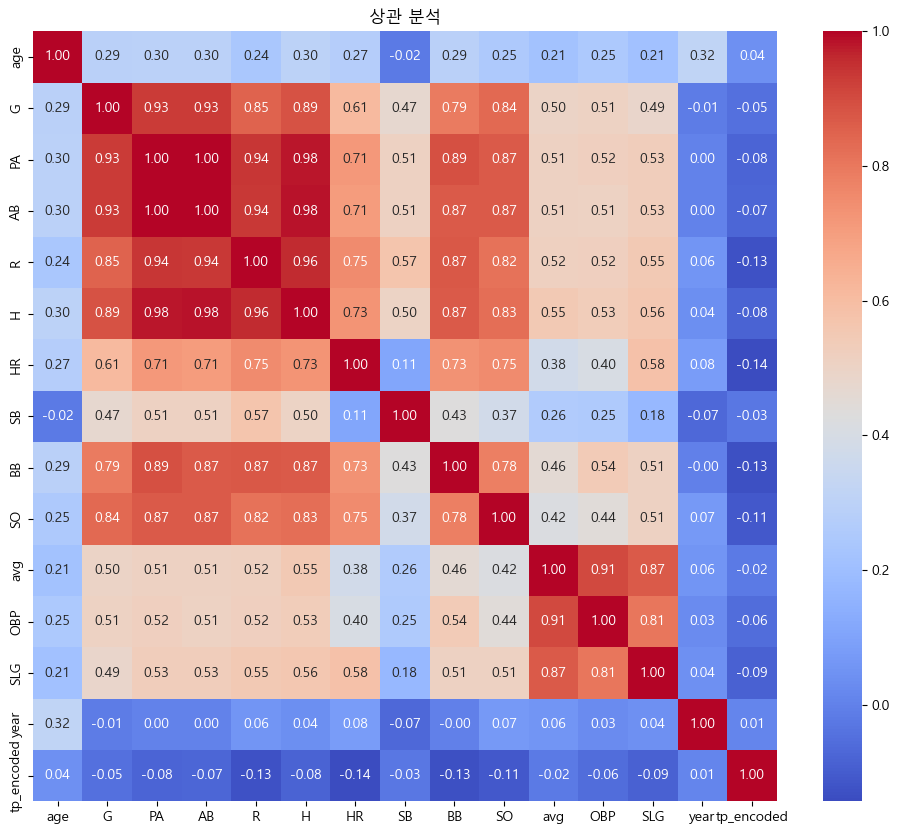

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# 차트에 한글 폰트 적용
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)

plt.figure(figsize=(12, 10))
sns.heatmap(x_train.corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            cbar=True)
plt.title('상관 분석')
plt.show()

### OPS 분포

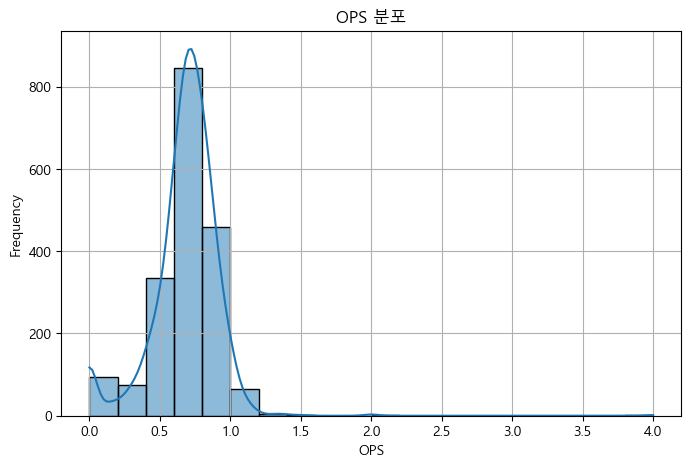

In [109]:
plt.figure(figsize=(8, 5))
sns.histplot(data['OPS'], kde=True, bins=20)
plt.title("OPS 분포")
plt.xlabel("OPS")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### 주요 변수 분포
- 나이
- 홈런

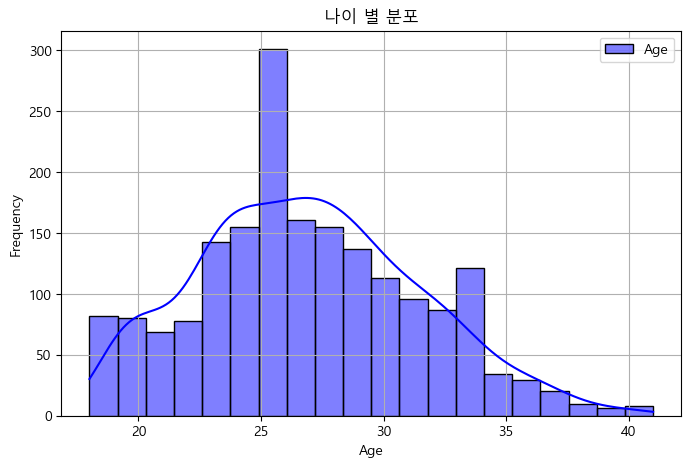

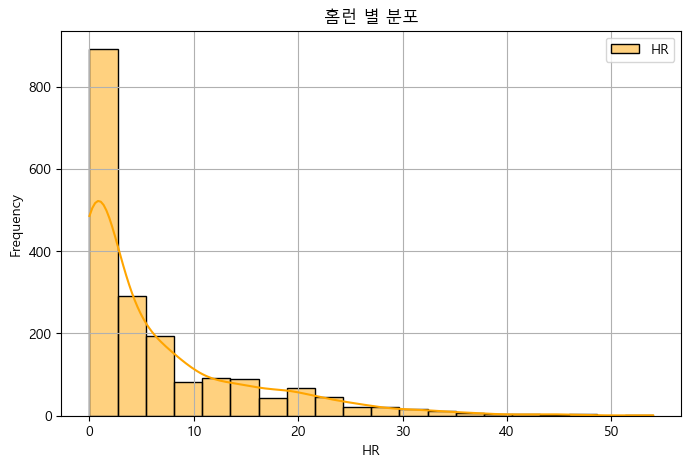

In [110]:
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], kde=True, bins=20, color='blue', label='Age')
plt.title("나이 별 분포")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data['HR'], kde=True, bins=20, color='orange', label='HR')
plt.title("홈런 별 분포")
plt.xlabel("HR")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### 군집 분석

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


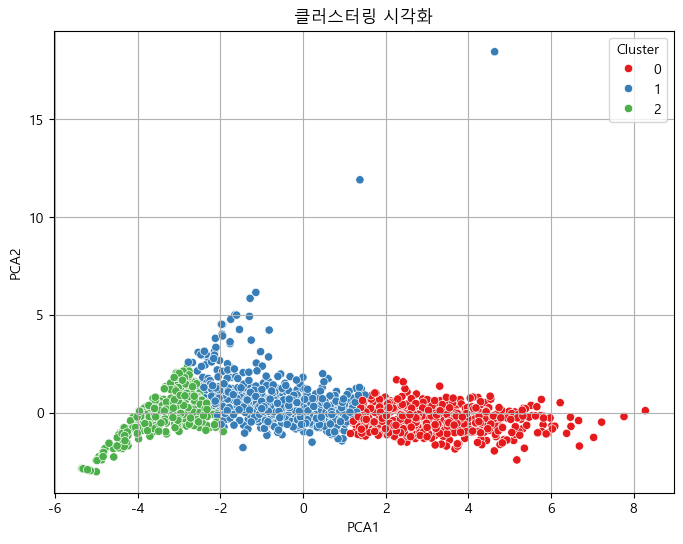

In [111]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 클러스터링 특성 선택
clustering_features = ['G', 'PA', 'AB', 'R', 'H', 'HR', 'SB', 'BB', 'SO', 'avg', 'OBP', 'SLG']

# 클러스터링 진행
kmeans = KMeans(n_clusters=3,
                random_state=42)
x_train['cluster'] = kmeans.fit_predict(x_train[clustering_features])

# 클러스터링 시각화
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_train[clustering_features])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0],
                y=pca_components[:, 1],
                hue=x_train['cluster'],
                palette='Set1')
plt.title('클러스터링 시각화')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### 연도 별 트렌드 분석
- 연도 별 OPS 트렌드
- 연도 별 HR 트렌드

C:\Users\USER\AppData\Local\Temp\ipykernel_29520\767952000.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data,


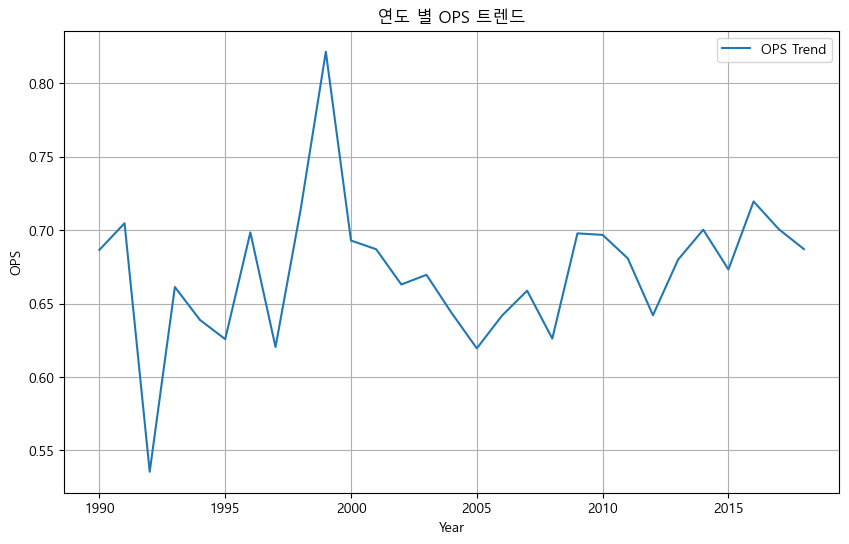

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(data, 
             x='year', 
             y='OPS', 
             ci=None, 
             label='OPS Trend')
plt.title("연도 별 OPS 트렌드")
plt.xlabel("Year")
plt.ylabel("OPS")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_29520\261568239.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data,


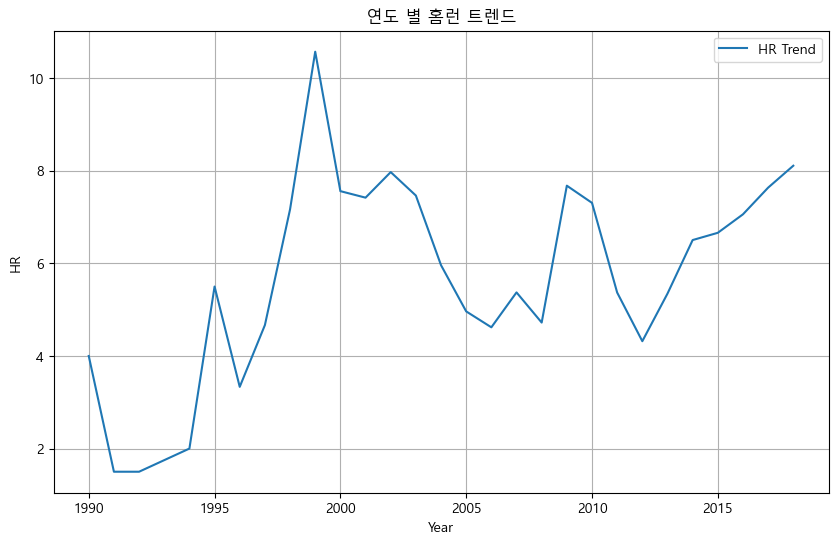

In [113]:
plt.figure(figsize=(10, 6))
sns.lineplot(data, 
             x='year', 
             y='HR', 
             ci=None, 
             label='HR Trend')
plt.title("연도 별 홈런 트렌드")
plt.xlabel("Year")
plt.ylabel("HR")
plt.legend()
plt.grid(True)
plt.show()

### 상위 10%와 하위 10% 타자 비교 분석
- 상위 10%는 전반적으로 G, PA, AB, R, H, HR, BB, OBP, SLG 등 모든 주요 지표에서 더 높은 평균을 보인다.
- 하위 10%는 SO에서 상대적으로 더 높은 비율을 보이면서, 대부부느이 주요 성과 지표에서 낮은 값을 기록했다.

,Top 10%,Bottom 10%
G,0.432556,-1.471070
PA,0.732188,-1.270583
AB,0.686245,-1.270655
R,1.055017,-1.111675
H,0.917710,-1.194947
HR,1.615114,-0.756497
SB,-0.034159,-0.604696
BB,1.086287,-1.069520
SO,0.701105,-1.203697
avg,1.168361,-2.060620


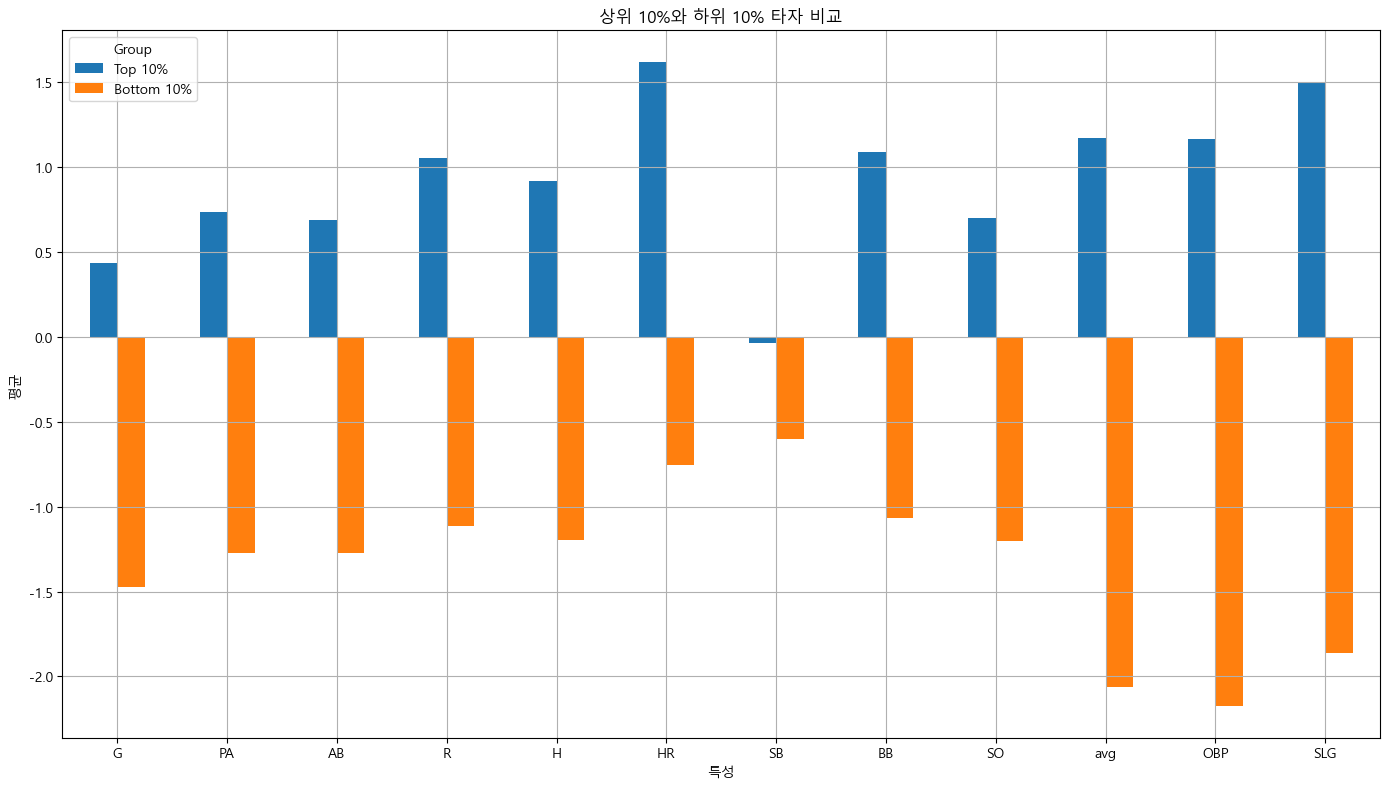

In [114]:
# 상위 10%, 하위 10% 기준 설정
top_10 = data_scale['OPS'].quantile(0.90)
bottom_10 = data_scale['OPS'].quantile(0.10)

# 상위 10%, 하위 10% 범위 설정
top_10 = data_scale[data_scale['OPS'] >= top_10]
bottom_10 = data_scale[data_scale['OPS'] <= bottom_10]

# 비교할 컬럼 설정
comparison_cols = ['G', 'PA', 'AB', 'R', 'H', 'HR', 'SB', 'BB', 'SO', 'avg', 'OBP', 'SLG']

# 상위 10%와 하위 10% 평균 설정
top_10_mean = top_10[comparison_cols].mean()
bottom_10_mean = bottom_10[comparison_cols].mean()

# 비교한 데이터를 데이터 프레임화
comparison_df = pd.DataFrame({'Top 10%' : top_10_mean,
                              'Bottom 10%' : bottom_10_mean})

display(comparison_df)

# 시각화
comparison_df.plot(kind='bar',
                   figsize=(14, 8))
plt.title('상위 10%와 하위 10% 타자 비교')
plt.ylabel('평균')
plt.xlabel('특성')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.tight_layout()
plt.grid(True)
plt.show()

## 예측 모델 구축

### avg 예측 모델
- random forest
  - RMSE : 0.28
  - MAE : 0.13
  - R2 : 0.92
- linear regression
  - RMSE : 0.33
  - MAE : 0.16
  - R2 : 0.88
- tuned random forest
  - RMSE : 0.27
  - MAE : 0.13
  - R2 : 0.92



In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# x, y 분리
x_train_avg = x_train.drop(columns=['avg'])
x_train_avg = x_train_avg.drop(columns=['cluster'])
x_test_avg = x_test.drop(columns=['avg'])

y_train_avg = x_train['avg']
y_test_avg = x_test['avg']

# 모델링
rf_model_avg = RandomForestRegressor(random_state=42, n_estimators=100)
linear_model_avg = LinearRegression()

rf_model_avg.fit(x_train_avg, y_train_avg)
linear_model_avg.fit(x_train_avg, y_train_avg)

rf_pred_avg = rf_model_avg.predict(x_test_avg)
linear_pred_avg = linear_model_avg.predict(x_test_avg)

# 평가
rf_metrics_avg = {'Model' : 'Random Forest',
                  'RMSE' : mean_squared_error(y_test_avg, rf_pred_avg, squared=False),
                  'MAE' : mean_absolute_error(y_test_avg, rf_pred_avg),
                  'R2' : r2_score(y_test_avg, rf_pred_avg)}

linear_metrics_avg = {'Model' : 'Linear Regression',
                      'RMSE' : mean_squared_error(y_test_avg, linear_pred_avg, squared=False),
                      'MAE' : mean_absolute_error(y_test_avg, linear_pred_avg),
                      'R2' : r2_score(y_test_avg, linear_pred_avg)}

print(rf_metrics_avg)
print(linear_metrics_avg)

{'Model': 'Random Forest', 'RMSE': 0.27873286562126964, 'MAE': 0.12510167660919178, 'R2': 0.9190829822659166}
{'Model': 'Linear Regression', 'RMSE': 0.3342015903438826, 'MAE': 0.1598011605677127, 'R2': 0.8836729986708285}


#### 하이퍼 파라미터 튜닝

In [125]:
# 하이퍼 파라미터 설정
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

gscv = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                    param_grid=param_grid_rf,
                    cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=1)

gscv.fit(x_train_avg, y_train_avg)

gscv_rf_model_avg = gscv.best_estimator_
gscv_rf_params = gscv.best_params_

gscv_rf_predict_avg = gscv_rf_model_avg.predict(x_test_avg)
gscv_rf_metrics_avg = {'Model' : 'Tuned Random Forest',
                       'RMSE' : mean_squared_error(y_test_avg, gscv_rf_predict_avg, squared=False),
                       'MAE' : mean_absolute_error(y_test_avg, gscv_rf_predict_avg),
                       'R2' : r2_score(y_test_avg, gscv_rf_predict_avg)}

display(gscv_rf_metrics_avg)

{'Model': 'Tuned Random Forest',
 'RMSE': 0.2709728446073688,
 'MAE': 0.1267678476628104,
 'R2': 0.9235257811515281}

### OPS 예측 모델
- random forest
  - RMSE : 0.09
  - MAE : 0.03
  - R2 : 0.99
- linear regression
  - RMSE : 1.0399691683965913e-15
  - MAE : 8.149954920243116e-16
  - R2 : 1.0
- tuned random forest
  - RMSE : 0.08
  - MAE : 0.02
  - R2 : 0.99



In [128]:
# x, y
x_train_ops = x_train.drop(columns=['cluster'])

# 모델링
rf_model_ops = RandomForestRegressor(random_state=42, n_estimators=100)
linear_model_ops = LinearRegression()

rf_model_ops.fit(x_train_ops, y_train)
linear_model_ops.fit(x_train_ops, y_train)

rf_pred_ops = rf_model_ops.predict(x_test)
linear_pred_ops = linear_model_ops.predict(x_test)

# 평가
rf_metrics_ops = {'Model' : 'Random Forest',
                  'RMSE' : mean_squared_error(y_test, rf_pred_ops, squared=False),
                  'MAE' : mean_absolute_error(y_test, rf_pred_ops),
                  'R2' : r2_score(y_test, rf_pred_ops)}

linear_metrics_ops = {'Model' : 'Linear Regression',
                      'RMSE' : mean_squared_error(y_test, linear_pred_ops, squared=False),
                      'MAE' : mean_absolute_error(y_test, linear_pred_ops),
                      'R2' : r2_score(y_test, linear_pred_ops)}

print(rf_metrics_ops)
print(linear_metrics_ops)

{'Model': 'Random Forest', 'RMSE': 0.08590415550377432, 'MAE': 0.02522666511679951, 'R2': 0.9911710840932894}
{'Model': 'Linear Regression', 'RMSE': 1.0399691683965913e-15, 'MAE': 8.149954920243116e-16, 'R2': 1.0}


#### 하이퍼 파라미터 튜닝

In [129]:
# 하이퍼 파라미터 설정
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

gscv = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                    param_grid=param_grid_rf,
                    cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=1)

gscv.fit(x_train_ops, y_train)

gscv_rf_model_ops = gscv.best_estimator_
gscv_rf_params = gscv.best_params_

gscv_rf_predict_ops = gscv_rf_model_ops.predict(x_test)
gscv_rf_metrics_ops = {'Model' : 'Tuned Random Forest',
                       'RMSE' : mean_squared_error(y_test, gscv_rf_predict_ops, squared=False),
                       'MAE' : mean_absolute_error(y_test, gscv_rf_predict_ops),
                       'R2' : r2_score(y_test, gscv_rf_predict_ops)}

display(gscv_rf_metrics_ops)

{'Model': 'Tuned Random Forest',
 'RMSE': 0.08017852632396316,
 'MAE': 0.024670655684381735,
 'R2': 0.9923087810628439}

### 결과 해석

1. AVG 예측 결과
- Random Forest
    - RMSE: 0.28
    - MAE: 0.13
    - R²: 0.92
    > 랜덤 포레스트는 평균 타율(AVG) 예측에서도 높은 설명력을 보여줍니다.
    
    > OPS 예측보다 성능이 약간 낮은데, 이는 타율의 변동성이 OPS보다 더 클 수 있음을 시사.
- Linear Regression
    - RMSE: 0.33
    - MAE: 0.16
    - R²: 0.88
    > 선형 회귀는 랜덤 포레스트에 비해 예측력이 낮지만, 타율 예측에 필요한 주요 선형 관계를 확인하는 데 적합.
    
    > 변수 간 비선형 관계를 잘 설명하지 못함.
- Tuned Random Forest
    - RMSE: 0.27
    - MAE: 0.13
    - R²: 0.92
    > 하이퍼파라미터 튜닝을 통해 기본 랜덤 포레스트보다 약간의 성능 개선이 이루어졌습니다.
    
    > 타율의 비선형 관계를 잘 반영하며, 튜닝된 랜덤 포레스트는 예측의 최적 옵션으로 보임.

2. OPS 예측 결과
- Random Forest
    - RMSE: 0.09
    - MAE: 0.03
    - R²: 0.99
    > 랜덤 포레스트는 매우 높은 예측 정확도를 보였으며, 실제 OPS 값과의 차이가 매우 적습니다.
    
    > 비선형 관계와 변수 간 상호작용을 잘 포착하여 높은 성능을 달성.
- Linear Regression
    - RMSE: 1.04e-15
    - MAE: 8.15e-16
    - R²: 1.0
    > 선형 회귀가 완벽한 예측 성능을 나타냈습니다. 이는 데이터 전처리 및 변수 간 선형 관계의 영향을 받은 것으로 보입니다.
    
    > 데이터 검증 및 분할 과정을 확인할 필요가 있으며, 현실적인 예측 모델로는 랜덤 포레스트가 더 적합.
- Tuned Random Forest
    - RMSE: 0.08
    - MAE: 0.02
    - R²: 0.99
    > 하이퍼파라미터 튜닝을 통해 기본 랜덤 포레스트보다 약간 개선된 성능을 보여줍니다.
    
    > RMSE와 MAE가 감소하며 예측 정확도가 높아졌습니다.

### 인사이트 도출

1. 타자 유형 별 인사이트
- 상위 10% 타자
  - 강점
    - OPS와 SLG가 높으며, 경기 중 장타 및 홈런 생산력이 주요 기여 요인.
    - AVG 역시 높은 비율을 보이며, 안정적인 출루와 장타를 겸비.
    - SO는 상대적으로 낮음.
  - 약점
    - SB의 수치로 보아 기동력이 다소 부족한 경향이 있어, 주루 플레이의 기여도가 적음.
  - 활용 전략
    - 장타 생산력을 최대화하기 위해 중심 타선에 배치.
    - 득점권 상황에서 높은 OPS를 활용하여 타점 기여 기대.
- 하위 10% 타자
  - 강점
    - SB와 같은 기동성 측면에서 강점을 드러냄.
  - 약점
    - OPS, SLG, OBP가 낮으며, 공격 생산성이 제한적.
    - 삼진 비율이 상대적으로 높아 타격 정확성이 부족.
  - 활용 전략
    - 하위 타선에서 출루 능력을 개선하는 훈련 강화 필요.
    - 기동력을 활용할 수 있는 상황에 전략적으로 기용 필요.

2. 팀 별 분석
- 팀 내 주요 타자 조합
  - OPS 예측 모들을 활용하여 팀 내 OPS 상위 3~4명 타자를 선별.
    - 중심 타선 배치로 득점 기회 극대화.
  - AVG 예측 모델을 활용하여 안정적으로 출루할 수 있는 타자를 선두타자로 배치.
- 팀 전략 추천
  - OPS 상위 타자의 활용
    - 홈 경기에서는 중심 타자 중심의 장타 전략 활용.
    - 특정 구장에서 SLG가 높은 타자 기용.
  - OPS 하위 타자의 개선 방안
    - 타격 훈련에서 OBP를 높이는 전략 적용.
    - 하위 타선에서 주루를 활용해 상대 투수 압박.

3. 미래 성과 예측 활용
- 트레이드 가치 평가
  - 예측 모델에서 OPS 상위 10% 타자는 팀의 핵심 자원으로 평가.
  - OPS와 AVG를 기반으로 장기 계약 및 트레이드 협상 시 활용.
- 경기 전략 수립
  - 특정 투수와의 대결에서 OPS와 AVG 예측을 기반으로 타자 매칭 전략 설계.
  - 미래 성과가 기대되는 신예 선수 육성
  - AVG 예측 결과를 통해 타격 훈련 강화 포인트를 파악

4. 제안된 전략 활용의 기대 효과
- 타자의 유형 분석
  - OPS 상위 타자의 최적 활용으로 경기 중 득점 기회 극대화.
  - OPS 하위 타자의 개선 방향을 구체화하여 팀 전반의 공격력 향상.
- 팀 전략
  - 데이터 기반 선수 배치로 경기 중 전략적 의사결저으이 정확도 상승.
  - 타자 성과에 따르 맞춤형 트레이닝 프로그램 개발.
- 미래 성과 활용
  - 장기적인 선수 가치를 평가 및 관리하여 팀 운영의 효율성을 강화.
  - 트레이드 협상에서 과학적이고 신뢰성 높은 근거를 제공.

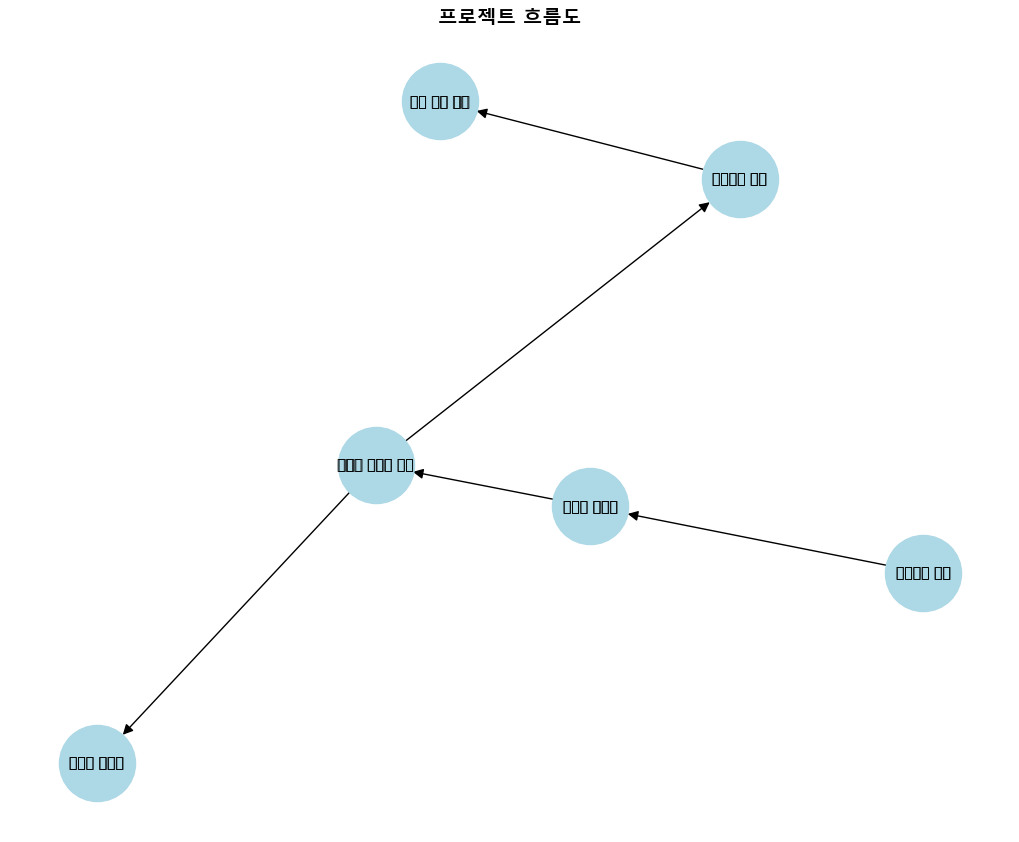

In [147]:
# Import matplotlib and networkx for visualization
import matplotlib.pyplot as plt
import networkx as nx

# 한글 폰트 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')  # 맑은 고딕 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# Create a directed graph
G = nx.DiGraph()

# Define nodes with their labels
nodes = {
    "프로젝트 목표": "프로젝트 목표",
    "데이터 전처리": "데이터 전처리",
    "탐색적 데이터 분석": "탐색적 데이터 분석",
    "데이터 모델링": "데이터 모델링",
    "인사이트 도출": "인사이트 도출",
    "결과 활용 방안": "결과 활용 방안",
}

# Add nodes to the graph
for node, label in nodes.items():
    G.add_node(node, label=label)

# Define edges (connections between nodes)
edges = [
    ("프로젝트 목표", "데이터 전처리"),
    ("데이터 전처리", "탐색적 데이터 분석"),
    ("탐색적 데이터 분석", "데이터 모델링"),
    ("탐색적 데이터 분석", "인사이트 도출"),
    ("인사이트 도출", "결과 활용 방안"),
]

# Add edges to the graph
G.add_edges_from(edges)

# Define positions for nodes
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=15)

# Add labels to nodes
node_labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color="black")

# Display the plot
plt.title("프로젝트 흐름도", fontsize=14, fontweight="bold")
plt.show()
